In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr  
import datetime

In [44]:
sp500 = yf.download("^GSPC", start="2001-01-01", end="2024-12-31")
sp500_close = sp500["Close"]
vix = yf.download("^VIX", start="2001-01-01", end="2024-12-31")
vix_close = vix["Close"]
## for dedfunds
fed_rate = pdr.get_data_fred('FEDFUNDS')  # Monthly  
start_date = "2001-01-01"
end_date = "2024-12-23"
fed_rate = pdr.get_data_fred('FEDFUNDS', start=start_date, end=end_date) 
fed_rate = fed_rate.resample('D').ffill()  # Convert to daily and forward-fill
## treasury
treasury = pdr.get_data_fred('DGS10')   
treasury = pdr.get_data_fred('DGS10', start=start_date, end=end_date)
treasury = treasury.resample('D').ffill() 

#cpi
cpi = pdr.get_data_fred('CPIAUCSL', start = start_date, end= end_date)
cpi = pdr.get_data_fred('CPIAUCSL').resample('D').ffill()

#oil
oil = yf.download('CL=F', start="2001-01-01", end="2024-12-31")["Close"]

# Gold

gold = yf.download('GC=F', start="2001-01-01", end="2024-12-31")["Close"] 
 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


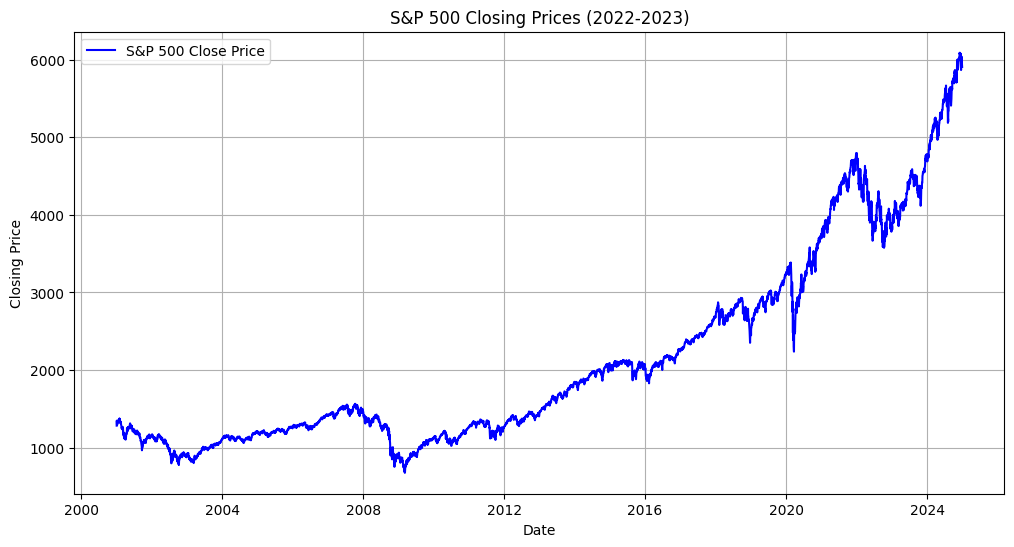

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Close"], label="S&P 500 Close Price", color='b')

# Formatting
plt.title("S&P 500 Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

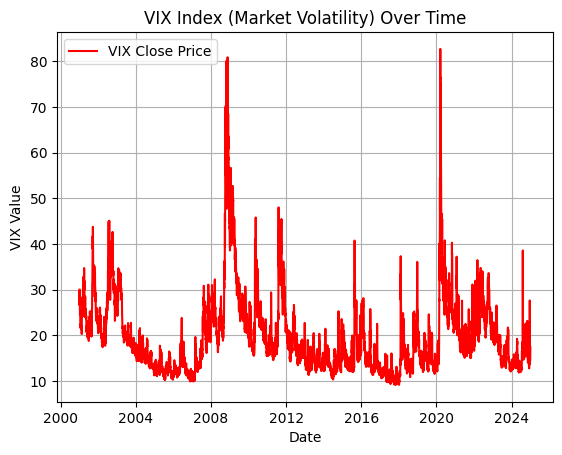

In [46]:
plt.plot(vix.index, vix["Close"], label="VIX Close Price", color='r')

# Formatting
plt.title("VIX Index (Market Volatility) Over Time")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [47]:
import pandas as pd

# 1. Create base dataframe with S&P 500 dates
df = sp500_close.rename("S&P_Close").to_frame()

# 2. Merge daily data (VIX, Oil, Gold)
daily_data = pd.concat([
    vix_close.rename("VIX_Close"),
    oil.rename("Oil_Close"),
    gold.rename("Gold_Close")
], axis=1)

df = df.merge(daily_data, left_index=True, right_index=True, how='left')

# 3. Merge forward-filled monthly data (FedRate, CPI)
monthly_data = pd.concat([
    fed_rate.rename("FedRate"),
    cpi.rename("CPI")
], axis=1)

df = df.merge(monthly_data, left_index=True, right_index=True, how='left')

# 4. Add Treasury yields (daily but might need forward-filling)
df = df.merge(treasury.rename("10Y_Treasury"), 
             left_index=True, right_index=True, how='left')

# 5. Final validation checks
def validate_data(df):
    # Check 1: No missing S&P values
    assert df['S&P_Close'].isna().sum() == 0
    
    # Check 2: Forward-filled monthly data consistency
    for col in ['FedRate', 'CPI']:
        # Ensure monthly values persist through full months
        monthly_changes = df[col].resample('M').last().diff().dropna()
        assert (monthly_changes != 0).any(), f"{col} not changing monthly"
        
    # Check 3: No future data leakage
    assert df.index.max() <= pd.to_datetime('2024-12-31')
    
    print("✅ Data validation passed!")

validate_data(df)

TypeError: 'str' object is not callable